# Análisis de datos con Python

## Objetivos

### EDA
Realizar un EDA (Exploratory Data Analysis) en busca de datos faltantes, valores atípicos,
registros duplicados o algún error en los datos que pueda invalidar su uso para su
posterior análisis.

In [4]:
# Importación de librerias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import warnings

In [5]:
# Importación del CSV y creación del dataframe

df = pd.read_csv("Intensidades_detectores_A3.csv")
df.head()

,Unnamed: 0,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras
0,0,DED_ A-3_0296+475_C_T01,CRECIENTE,5,01/02/2025,0:00,20,9,11,0.55,95.500,0,5
1,1,DED_ A-3_0296+475_C_T01,CRECIENTE,5,01/02/2025,0:05,17,7,10,0.59,96.059,0,5
2,2,DED_ A-3_0296+475_C_T01,CRECIENTE,5,01/02/2025,0:10,17,11,6,0.35,98.235,0,5
3,3,DED_ A-3_0296+475_C_T01,CRECIENTE,5,01/02/2025,0:15,7,4,3,0.43,110.143,2,5
4,4,DED_ A-3_0296+475_C_T01,CRECIENTE,5,01/02/2025,0:20,10,6,4,0.40,104.200,1,5


In [6]:
# Se elimina la columna Unnamed:0 por ser un índice extra innecesario

df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72555 entries, 0 to 72554
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre equipo       72555 non-null  object 
 1   Sentido             72555 non-null  object 
 2   Semana              72555 non-null  int64  
 3   Dia                 72555 non-null  object 
 4   Hora                72555 non-null  object 
 5   Intensidad total    72555 non-null  int64  
 6   Intensidad ligeros  72555 non-null  int64  
 7   Intensidad pesados  72555 non-null  int64  
 8   % pesados           72555 non-null  float64
 9   Velocidad media     72555 non-null  float64
 10  Muestras a 0        72555 non-null  int64  
 11  Muestras            72555 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 6.6+ MB


In [7]:
# Cambio a formato datetime de la columna "Dia"

df['Dia'] = pd.to_datetime(df['Dia'], format='%d/%m/%Y')

# Creación de la columna "Dia_semana" para mejorar la visualización de los datos

df['Dia_semana'] = df['Dia'].dt.day_name()

# AL estar en inglés la función ".dt.day_name()", creo un diccionario con los nombres en español para sustituirlos posteriormente

dias_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['Dia_semana'] = df['Dia_semana'].map(dias_ingles_espanol)

In [8]:
# Extraer el carril (ej: "T01") usando una expresión regular

df["Carril"] = df["Nombre equipo"].str.extract(r'_T(\d{2})')[0]

In [9]:
#Filtrado del dataframe según el enunciado (sentido decreciente del PK 305+050)
df_filtrado = df[df["Nombre equipo"].str.contains("0305+050_D", regex=False)]
df_filtrado.head()

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril
48380,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:00,20,9,11,0.55,95.100,0,5,Sábado,01
48381,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:05,14,11,3,0.21,111.429,1,5,Sábado,01
48382,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:10,10,6,4,0.40,112.000,1,5,Sábado,01
48383,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:15,15,7,8,0.53,99.267,0,5,Sábado,01
48384,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:20,11,8,3,0.27,101.182,1,5,Sábado,01


In [10]:
# Comprobación de que el filtrado es correcto en sentido decreciente

df_filtrado[df_filtrado["Sentido"]=="CRECIENTE"]

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril


In [11]:
# Observación general de los features del dataframe

df_filtrado.describe()

,Semana,Dia,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras
count,24175.000000,24175,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000
mean,7.215140,2025-02-14 12:08:36.434332928,17.857001,12.272430,5.584571,0.215166,92.673765,1.698780,4.965336
min,5.000000,2025-02-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,6.000000,2025-02-08 00:00:00,2.000000,1.000000,0.000000,0.000000,92.122000,0.000000,5.000000
50%,7.000000,2025-02-15 00:00:00,10.000000,7.000000,1.000000,0.080000,109.333000,1.000000,5.000000
75%,8.000000,2025-02-22 00:00:00,34.000000,21.000000,7.000000,0.380000,120.000000,4.000000,5.000000
max,9.000000,2025-02-28 00:00:00,99.000000,94.000000,51.000000,1.000000,200.000000,5.000000,5.000000
std,1.205872,NaN,18.144460,13.794263,8.891016,0.276762,44.128276,1.955982,0.190247


In [12]:
# Tamaño del dataframe

df_filtrado.shape

(24175, 14)

In [13]:
# Comprobación de valores nulos y tipo de datos en las columnas

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24175 entries, 48380 to 72554
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nombre equipo       24175 non-null  object        
 1   Sentido             24175 non-null  object        
 2   Semana              24175 non-null  int64         
 3   Dia                 24175 non-null  datetime64[ns]
 4   Hora                24175 non-null  object        
 5   Intensidad total    24175 non-null  int64         
 6   Intensidad ligeros  24175 non-null  int64         
 7   Intensidad pesados  24175 non-null  int64         
 8   % pesados           24175 non-null  float64       
 9   Velocidad media     24175 non-null  float64       
 10  Muestras a 0        24175 non-null  int64         
 11  Muestras            24175 non-null  int64         
 12  Dia_semana          24175 non-null  object        
 13  Carril              24175 non-null  object     

In [14]:
# Comprobación de duplicados

df_filtrado.duplicated().sum()

0

- Voy a pasar los días a formato datetime y a crear una columna llamada días de la semana para poder analizar mejor los datos

In [16]:
# Busqueda de algún valor atípico dando un vistazo general

for columna in df_filtrado.columns:
    print(f"Valores únicos y frecuencia en la columna '{columna}':")
    print(df_filtrado[columna].value_counts())
    print("\n")  

Valores únicos y frecuencia en la columna 'Nombre equipo':
Nombre equipo
DED_   A-3_0305+050_D_T01    8064
DED_   A-3_0305+050_D_T02    8064
DED_   A-3_0305+050_D_T03    8047
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Sentido':
Sentido
DECRECIENTE    24175
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Semana':
Semana
7    6048
8    6048
6    6031
9    4320
5    1728
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Dia':
Dia
2025-02-01    864
2025-02-02    864
2025-02-27    864
2025-02-26    864
2025-02-25    864
2025-02-24    864
2025-02-23    864
2025-02-22    864
2025-02-21    864
2025-02-20    864
2025-02-19    864
2025-02-18    864
2025-02-17    864
2025-02-16    864
2025-02-15    864
2025-02-14    864
2025-02-13    864
2025-02-12    864
2025-02-11    864
2025-02-10    864
2025-02-09    864
2025-02-08    864
2025-02-07    864
2025-02-05    864
2025-02-04    864
2025-02-03    864
2025-02-28    864
2025-02-06 

- Se puede observar que en la columna **"Muestras"** hay un **3,34%** de los valores en los que **no se obtiene el valor 5** tal y como debería ser.
- Al no ser valores de la columna **"Muestras a 0"**, en los cuales se cuentan como errores, los voy a considerar **datos erróneos** y los voy a eliminar.

In [18]:
df_filtrado[df_filtrado["Muestras"] != 5]

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril
48388,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:40,2,0,2,1.00,126.000,3,4,Sábado,01
48391,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:55,7,4,3,0.43,104.429,0,4,Sábado,01
48412,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,2:40,11,4,7,0.64,97.364,0,4,Sábado,01
48448,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,5:40,10,4,6,0.60,91.400,1,4,Sábado,01
48650,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,22:30,9,7,2,0.22,114.556,1,4,Sábado,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72504,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,19:45,10,9,1,0.10,125.700,2,4,Viernes,03
72515,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,20:40,5,5,0,0.00,119.000,1,4,Viernes,03
72523,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,21:20,0,0,0,0.00,0.000,4,4,Viernes,03
72527,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,21:40,0,0,0,0.00,0.000,4,4,Viernes,03


In [19]:
# Se eliminan los valores de muestras diferentes de 5

df_filtrado = df_filtrado[df_filtrado["Muestras"] ==5]

In [20]:
df_filtrado.describe()

,Semana,Dia,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras
count,23367.000000,23367,23367.000000,23367.000000,23367.000000,23367.000000,23367.000000,23367.000000,23367.0
mean,7.216202,2025-02-14 12:33:22.208242176,18.320623,12.578508,5.742115,0.217158,92.651680,1.684170,5.0
min,5.000000,2025-02-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,6.000000,2025-02-08 00:00:00,2.000000,1.000000,0.000000,0.000000,92.143000,0.000000,5.0
50%,7.000000,2025-02-15 00:00:00,11.000000,7.000000,1.000000,0.090000,109.051000,1.000000,5.0
75%,8.000000,2025-02-22 00:00:00,34.000000,21.000000,7.000000,0.390000,119.796500,4.000000,5.0
max,9.000000,2025-02-28 00:00:00,99.000000,94.000000,51.000000,1.000000,200.000000,5.000000,5.0
std,1.205670,NaN,18.252401,13.904123,8.992407,0.276755,43.883815,1.971673,0.0


In [21]:
# Detección de velocidades negativas, si hay, y por tanto errores en esta columna

errores = df_filtrado[df_filtrado["Velocidad media"] < 0]

if not errores.empty:
    
    print(f"Valores imposibles en 'Velocidad': {len(errores)}")

### Outliers
- Para una visualización más profunda de los outliers/valores atípicos, voy a realizar boxplots para cada una de las columnas numéricas

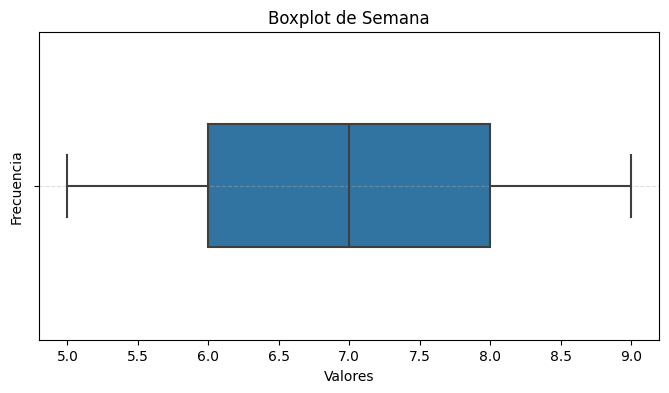

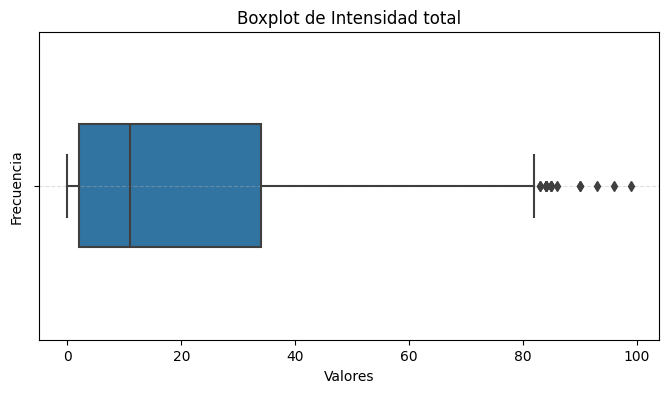

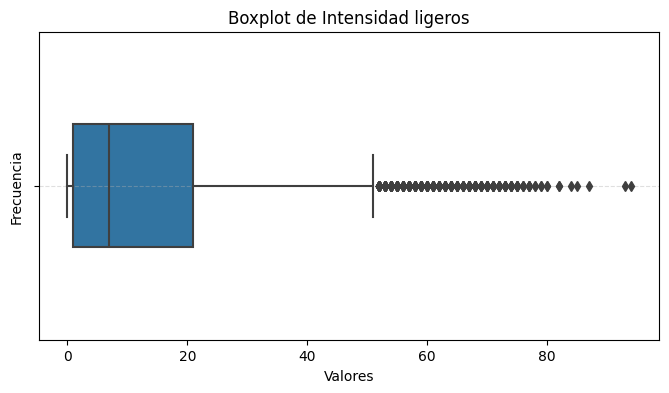

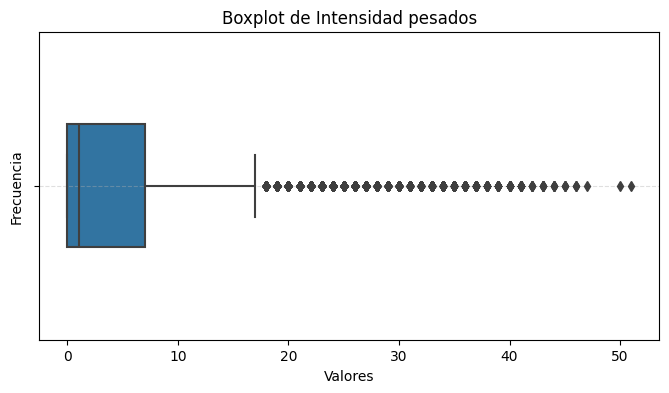

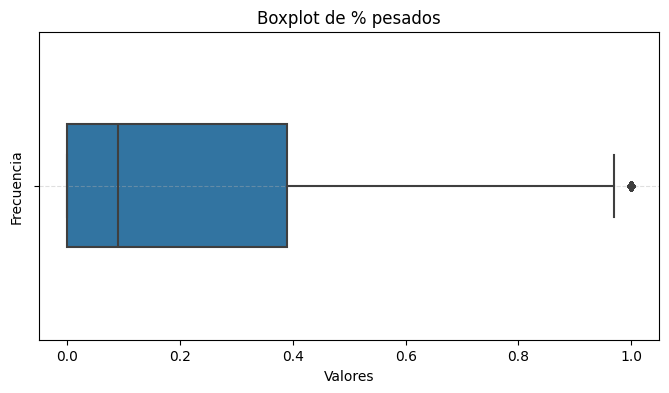

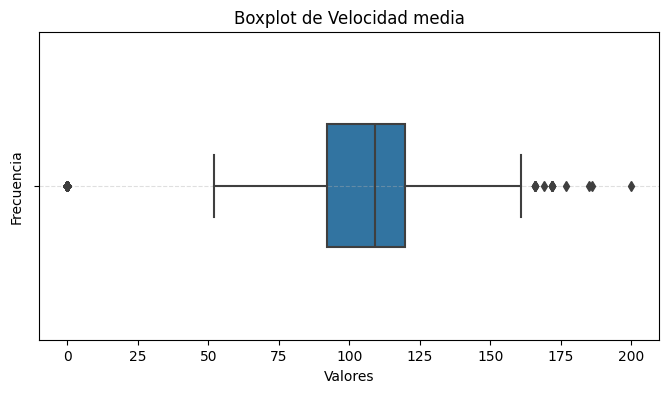

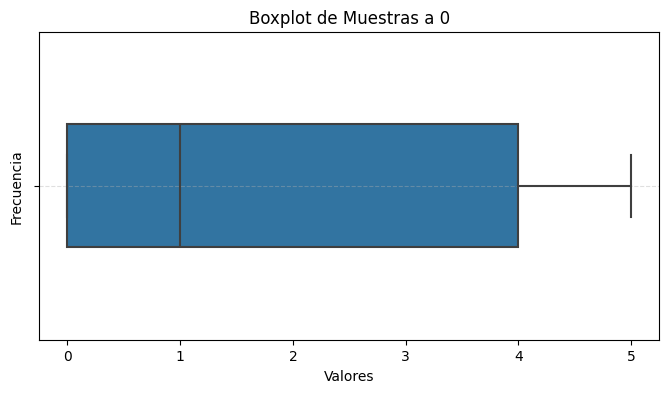

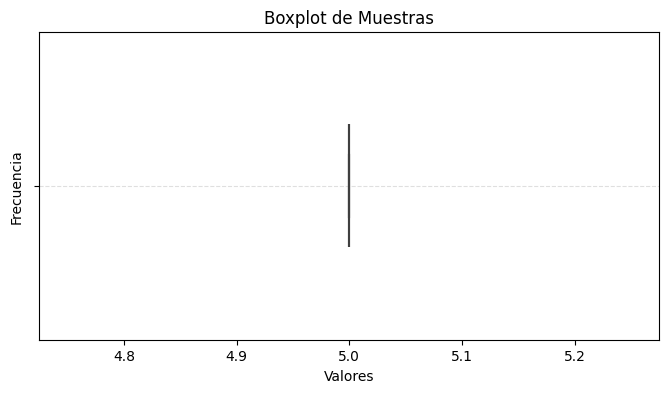

In [23]:
# Boxplot sobre las variables numéricas del dataframe para detectar valores atípicos

numeric_cols = df_filtrado.select_dtypes(include=['int64', 'float64']).columns

# Bucle para cada columna númerica 

for col in numeric_cols:
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_filtrado[col],
                width=0.4,
                linewidth=1.5)
    
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    
    plt.xlabel('Valores', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.title(f"Boxplot de {col}")
    
    plt.show()
    

#### Intensidad Total

In [25]:
# Comprobación de la franja horaria con valores atípicos en Intensidad total 

df_filtrado[df_filtrado['Intensidad total'] > 80].groupby('Hora').size()

Hora
16:15    1
16:25    1
16:30    1
16:45    1
16:50    3
16:55    2
17:05    1
17:10    1
17:25    1
17:30    1
17:40    1
18:00    1
18:20    1
18:25    1
18:30    1
18:40    1
18:50    1
dtype: int64

- Se puede observar que la franja va desde las 16:15 a las 18:50, por lo tanto es un periodo de tiempo en el que es normal que hayan más vehículos

In [27]:
# Se comprueba que el cálculo de intensidad total sea correcto

df_filtrado[df_filtrado['Intensidad total'] - df_filtrado['Intensidad ligeros'] != df_filtrado['Intensidad pesados']]

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril


In [28]:
df_filtrado[df_filtrado['Intensidad total'] > 80]

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril
58375,DED_ A-3_0305+050_D_T02,DECRECIENTE,6,2025-02-07,16:55,84,77,7,0.08,118.000,0,5,Viernes,02
58381,DED_ A-3_0305+050_D_T02,DECRECIENTE,6,2025-02-07,17:25,84,77,7,0.08,116.024,0,5,Viernes,02
58393,DED_ A-3_0305+050_D_T02,DECRECIENTE,6,2025-02-07,18:25,90,84,6,0.07,112.500,0,5,Viernes,02
60385,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,16:25,86,80,6,0.07,114.267,0,5,Viernes,02
60386,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,16:30,96,85,11,0.11,112.115,0,5,Viernes,02
60389,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,16:45,90,87,3,0.03,116.444,0,5,Viernes,02
60390,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,16:50,83,79,4,0.05,115.494,0,5,Viernes,02
60393,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,17:05,84,80,4,0.05,113.714,0,5,Viernes,02
60394,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,17:10,83,72,11,0.13,115.518,0,5,Viernes,02
60398,DED_ A-3_0305+050_D_T02,DECRECIENTE,7,2025-02-14,17:30,84,78,6,0.07,116.179,0,5,Viernes,02


- Finalmente, se observa que los días en los que se produce esta situación son los viernes, por tanto, al repetirse este suceso cada semana del mes, se tomarán como válidos y no serán descartados.

#### Velocidad Media

- Se analiza el número de Muestras a 0 para la velocidad media de 0 encontrada en el boxplot

In [32]:
print(df_filtrado[df_filtrado['Velocidad media'] == 0]['Muestras a 0'].value_counts())

Muestras a 0
5    3978
Name: count, dtype: int64


- Al no tener ni una medida correcta, serán descartados

In [34]:
# Se eliminan los valores con Velocidad Media = 0

df_filtrado = df_filtrado[df_filtrado['Velocidad media'] != 0]

- Al observar las velocidades más altas, destacan algunas exageradas por encima de los 140km/h
- Voy a analizar a que porcentaje del total corresponden estos datos para descartarlos en caso de que sea muy bajo, ya que pueden modificar conclusiones obtenidas del total

In [38]:
# 1. Conteo del número total de registros por encima de 140km/h
num_outliers = len(df_filtrado[df_filtrado["Velocidad media"] > 140])

# 2. Conteo del número total de registros
total_registros = len(df_filtrado)

# 3. Cálculo del porcentaje
porcentaje_outliers = (num_outliers / total_registros) * 100

# 4. Porcentaje con dos decimales del resultado
print(f"Porcentaje de registros > 140 km/h: {porcentaje_outliers:.2f}%")

Porcentaje de registros > 140 km/h: 1.97%


- Tras realizar un vistazo general a los valores de las columnas cuando la velocidad es mayor de 140 km/H, se puede comprobar que las muestras a 0 y la poca cantidad de vehiculos registrados influyen en el resultado

In [42]:
df_filtrado[df_filtrado["Velocidad media"] > 140]

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril
52725,DED_ A-3_0305+050_D_T01,DECRECIENTE,7,2025-02-16,2:05,2,2,0,0.00,141.0,3,5,Domingo,01
52764,DED_ A-3_0305+050_D_T01,DECRECIENTE,7,2025-02-16,5:20,1,1,0,0.00,141.0,4,5,Domingo,01
56449,DED_ A-3_0305+050_D_T02,DECRECIENTE,5,2025-02-01,0:25,4,2,2,0.50,169.0,3,5,Sábado,02
56503,DED_ A-3_0305+050_D_T02,DECRECIENTE,5,2025-02-01,4:55,1,1,0,0.00,155.0,4,5,Sábado,02
56737,DED_ A-3_0305+050_D_T02,DECRECIENTE,5,2025-02-02,0:25,2,2,0,0.00,141.0,3,5,Domingo,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72346,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,6:35,2,2,0,0.00,146.0,3,5,Viernes,03
72356,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,7:25,3,3,0,0.00,145.0,2,5,Viernes,03
72525,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,21:30,3,2,1,0.33,150.0,3,5,Viernes,03
72534,DED_ A-3_0305+050_D_T03,DECRECIENTE,9,2025-02-28,22:15,1,1,0,0.00,141.0,4,5,Viernes,03


- Al ser un porcentaje bajo y la velocidad ser demasiado alta para condiciones reales de circulación, procedo a eliminar los valores de velocidades mayores a 140km/h

In [51]:
df_filtrado = df_filtrado[df_filtrado['Velocidad media'] <= 140]

#### Outliers en % de pesados

In [58]:
# Se comprueba que el 100% de pesados es correcto en los datos y que por tanto no hay vehículos ligeros en esta muestra

# Creación de una copia con % de pesados al 100%

df_pesados_100 = df_filtrado[df_filtrado['% pesados'] == 1].copy() 

# Se comprueba si hay ligeros con el 100% de pesados

total_inconsistentes = len(df_pesados_100[df_pesados_100['Intensidad ligeros'] > 0]) 
print(f"Registros inconsistentes (100% de vehículos pesados pero con ligeros): {total_inconsistentes}") 

Registros inconsistentes (100% de vehículos pesados pero con ligeros): 0


- Tengo la teoría de que los registros con el 100% de vehículos pesados pueden ser por la madrugada, ya que deben ser  principalmente camiones y autobuses de transporte.
- Para comprobarlo voy a dividir el día en grupos (bins) de 6 horas, en caso de ser cierta mi teoría, los datos se concentraran en las horas de la madrugada.

In [60]:
# Conversión de la hora a tipo datetime para facilitar el análisis

df_pesados_100['Hora'] = pd.to_datetime(df_pesados_100['Hora'], format='%H:%M').dt.time

# Extracción de la hora en formato numérico  

df_pesados_100['Hora_num'] = df_pesados_100['Hora'].apply(lambda x: x.hour)

# Se crean las franjas horarias de forma que se incluye la horá de la izquierda y no la de la derecha. Ej.: [0,6), [6,12) 

df_pesados_100['Franja_horaria'] = pd.cut(
    df_pesados_100['Hora_num'],
    bins=[0, 6, 12, 18, 24],
    labels=['Madrugada (0-6h)', 'Mañana (6-12h)', 'Tarde (12-18h)', 'Noche (18-24h)'],
    right=False
)

C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


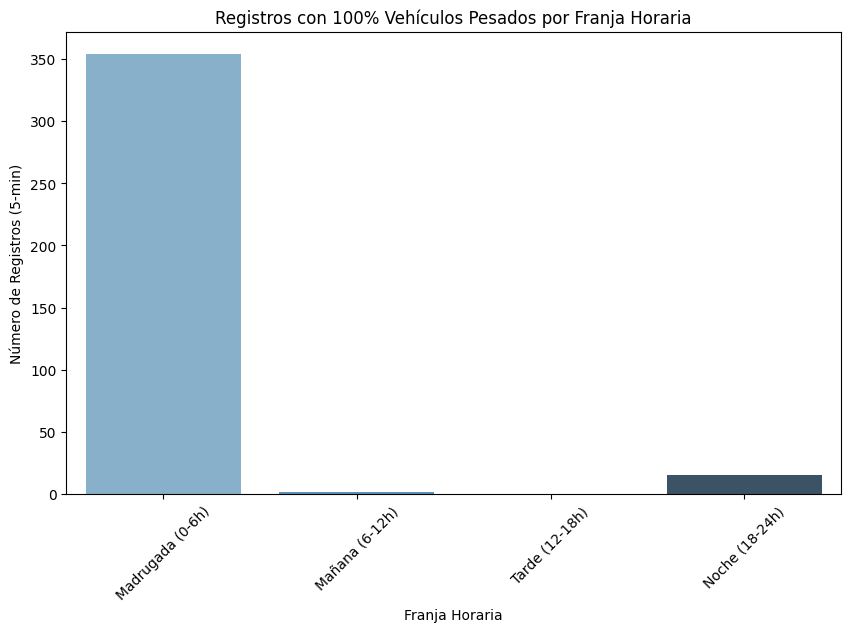

In [61]:
# Conteo de los registros en cada franja horaria

counts = df_pesados_100['Franja_horaria'].value_counts().sort_index()

# Creación del gráfico para observar la cantidad de registros en cada franja

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='Blues_d')
plt.title('Registros con 100% Vehículos Pesados por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Registros (5-min)')
plt.xticks(rotation=45)

plt.show()

- Se confirma la teoría inicial de que los registros con el 100% de vehículos pesados son por la madrugada, por tanto no son valores atípicos que descartar, ya que se producen en condiciones específicas que condicionan que ocurran de forma habitual. Por tanto no se descartarán.

#### Outliers en Muestras a 0

-Tener en cuenta en la exploración de datos los casos en los que la feature Muestras a 0 no tiene un valor nulo, ya que eso indica que, en un registro, no se cuenta con los datos de los 5 minutos completos ya que ha habido algún fallo en el detector. No es necesario realizar una imputación o tratamiento de estos datos, aunque si recomendable, lo que se busca es que el candidato tenga en cuenta posibles fallos en los datos. Responde a la pregunta: 

##### ¿Cómo manejarías esta falta de datos y que técnicas utilizarías para corregirlo?

- Para analizar las muestras a 0 voy a crear un gráfico de tarta para ver la cantidad de cada valor de la columna

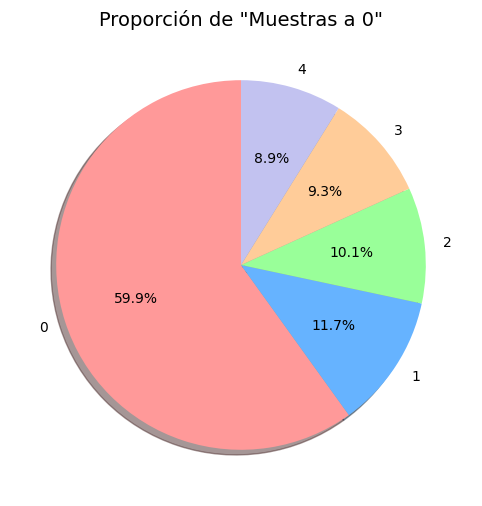

In [66]:
# Creación de un piechart para visualizar la proporción de valores de la columna "Muestras a 0"

# Conteo de cada valor
counts = df_filtrado["Muestras a 0"].value_counts().sort_index()

plt.figure(figsize=(8, 6))  

counts.plot(kind='pie', 
            autopct='%1.1f%%',  # Se muestran los porcentajes, con un decimal en este caso
            startangle=90,
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'],
            shadow=True)       


plt.title('Proporción de "Muestras a 0"', fontsize=14)
plt.ylabel('')  


plt.show()

- Al ser poco fiables, voy a eliminar los registros con 4 y 3 valores a 0.
- He tenido dudas respecto a los 3 errores, pero con solo 2 registros no considero que el resultado sea fiable.
- Los registros con 5 valores a 0 fueron eliminados previamente al detectar velocidades medias de 0 km/h.

In [73]:
# Se eliminan los registros con más de 2 valores a 0

df_filtrado = df_filtrado[df_filtrado["Muestras a 0"] <= 2]

- En cuanto a los registros con 1 y 2 valores a 0, voy a ajustarlos de manera que sumaré el valor de la media entre el total de registros correctos (minutos en los que ha funcionado), multiplicado por 5 para realizar el ajuste al total.
- Para la columna velocidad media se mantiene igual.

In [77]:
# Creación de una lista con las columnas que se van a ver modificadas por el ajuste

columnas_intensidad = ["Intensidad total", "Intensidad ligeros", "Intensidad pesados"]

# Aplicar ajuste proporcional solo donde hay fallos (Muestras a 0 = 1 o 2)

for col in columnas_intensidad:
   df_filtrado[col] = np.where(
        df_filtrado["Muestras a 0"] >= 1,  # Se filtra si hay 1 o 2 fallos
        df_filtrado[col] * (5 / (5 - df_filtrado["Muestras a 0"])),  # Se añade dependiendo de la proporción de fallos
        df_filtrado[col]  # En caso de no haber fallos se mantiene el valor tal y como estaba
    )

# Redondeo y paso de float a int los valores tras el ajuste

df_filtrado[columnas_intensidad] = df_filtrado[columnas_intensidad].round().astype(int)

# Para mantener el % de pesados correcto, se recalcula

df_filtrado["% pesados"] = (df_filtrado["Intensidad pesados"] / df_filtrado["Intensidad total"]).round(2)

In [78]:
df_filtrado.head()

,Nombre equipo,Sentido,Semana,Dia,Hora,Intensidad total,Intensidad ligeros,Intensidad pesados,% pesados,Velocidad media,Muestras a 0,Muestras,Dia_semana,Carril
48380,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:00,20,9,11,0.55,95.100,0,5,Sábado,01
48381,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:05,18,14,4,0.22,111.429,1,5,Sábado,01
48382,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:10,12,8,5,0.42,112.000,1,5,Sábado,01
48383,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:15,15,7,8,0.53,99.267,0,5,Sábado,01
48384,DED_ A-3_0305+050_D_T01,DECRECIENTE,5,2025-02-01,0:20,14,10,4,0.29,101.182,1,5,Sábado,01


### Estadísticos básicos

- Obtener estadísticos básicos (media, moda, mediana, cuartiles, etc.) de cada uno de los carriles y representarlos en gráficos de barras u otros gráficos que el candidato considere. Responder a:

#### ¿En base a los estadísticos, qué diferencias entre carriles observa el candidato?

In [84]:
# Primero de todo voy a hacer un diccionario con las variables y prefijos a analizar

variables = {
    'Intensidad total': 'Intensidad_',
    'Intensidad ligeros': 'Intensidad_ligeros_',
    'Intensidad pesados': 'Intensidad_pesados_',
    'Velocidad media': 'Velocidad_',
    '% pesados': '%_pesados_'
}

# Posteriormente creo un diccionario para almacenar los resultados

stats_dict = {}

# Con un bucle for que itera sobre las variables, calculo las estadisticas relevantes

for var, prefix in variables.items():
    stats_dict[prefix] = df_filtrado.groupby("Carril")[var].agg(
        Media="mean",
        Mediana="median",
        Desviación="std",
        Mínimo="min",
        Máximo="max",
        Moda=lambda x: x.mode()[0]
    ).add_prefix(prefix)

# Finalmente se concatenan todos los resultados y se almacenan en stats_final

stats_final = pd.concat(stats_dict.values(), axis=1)


- Con esta **función** se itera sobre los carriles y se recorren las métricas deseadas, para finalmente obtener los valores del carril y la métrica para añadirlos a un diccionario el cual se convierte a un dataframe como valor de salida.

In [87]:
def prepare_data(stats_df, variable_prefix):
    metricas = ["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
    data = []
    for carril in stats_df.index:
        for metrica in metricas:
            valor = stats_df.loc[carril, f"{variable_prefix}_{metrica}"]
            data.append({"Carril": carril, "Métrica": metrica, "Valor": valor})
    return pd.DataFrame(data)

#### Gráficas de cada Columna

##### Intensidad total

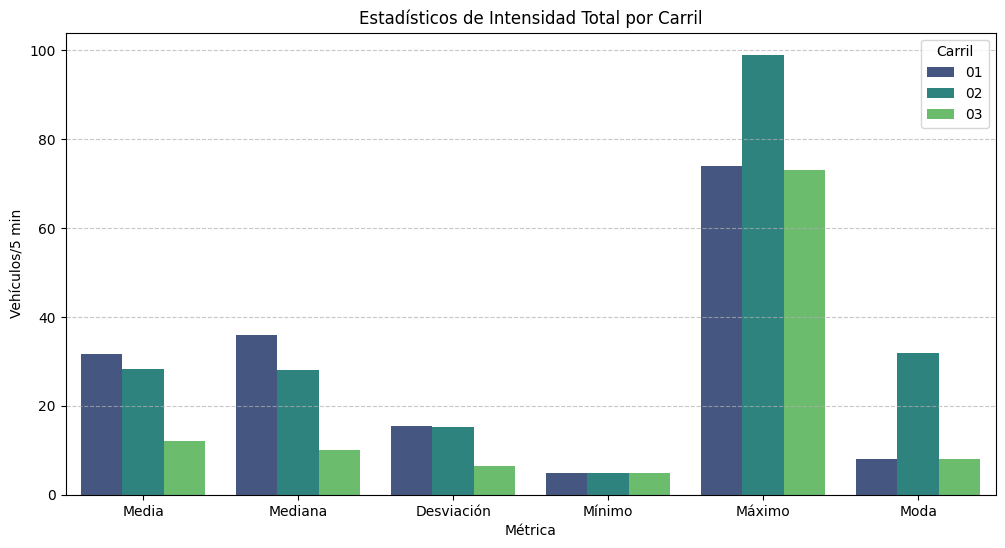

In [92]:
# Se llama a la función prepare_data para la variable Intensidad Total
intensidad_long = prepare_data(stats_final, "Intensidad")

# Se crea el gráfico de barras para calcular las métricas de Intensidad Total para cada carril
plt.figure(figsize=(12, 6))
sns.barplot(
    data=intensidad_long,
    x="Métrica",
    y="Valor",
    hue="Carril",
    palette="viridis",
    order=["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
)
plt.title("Estadísticos de Intensidad Total por Carril")
plt.ylabel("Vehículos/5 min")
plt.xlabel("Métrica")
plt.legend(title="Carril")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

###### Conclusiones de intensidad total

- Se puede observar como la intensidad total es superior cuanto más a la derecha esté el carril. En el carril 01, es decir, el carril derecho, es donde se encuentra la mayor parte de los vehiculos. En el carril 02 baja un poco la media, y finalmente en el carril 03 se produce una bajada pronunciada.

- Es destacable que el máximo se produzca en el carril 02. Mi teoria es que al ser un máximo, probablemente se deba a una situación con gran tráfico de vehículos, y el carril 02 ha sido el carril "rápido" en este atasco. Por tanto, se habrán registrado más coches en este carril que en los otros.

##### Intensidad de ligeros

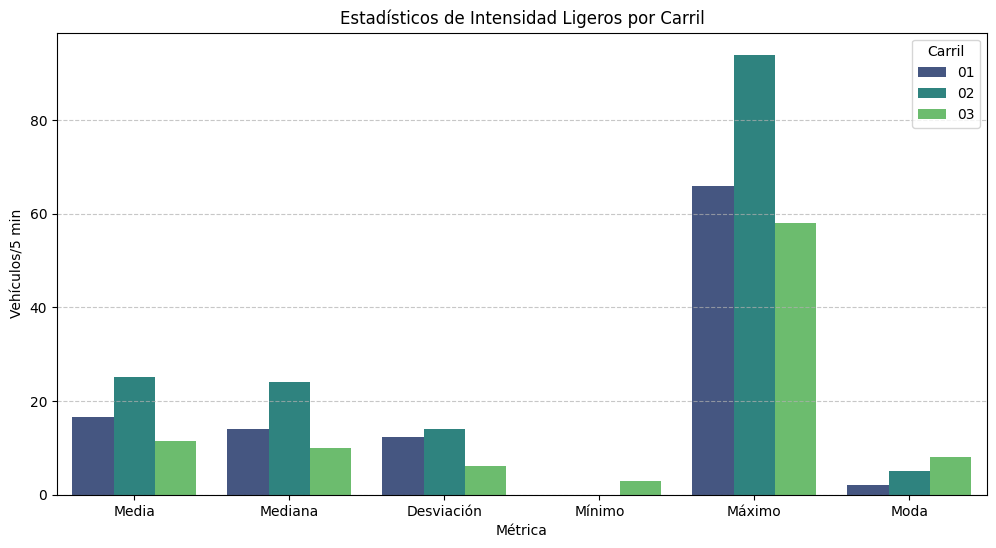

In [99]:
# Se llama a la función prepare_data con la variable "Intensidad ligeros"

intensidad_ligeros_long = prepare_data(stats_final, "Intensidad_ligeros")

# Se crea el gráfico de barras para calcular las métricas de Intensidad Total para cada carril

plt.figure(figsize=(12, 6))
sns.barplot(
    data=intensidad_ligeros_long,
    x="Métrica",
    y="Valor",
    hue="Carril",
    palette="viridis",
    order=["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
)
plt.title("Estadísticos de Intensidad Ligeros por Carril")
plt.ylabel("Vehículos/5 min")
plt.xlabel("Métrica")
plt.legend(title="Carril")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Conclusiones de Intensidad ligero

En cuanto a la intensidad de ligeros hay mayor número de coches en el carril 02 que en el 01 y el 03. Esto, aunque contradictorio respecto a los resultados obtenidos en la "Intensidad total", se puede explicar teniendo en cuanta varios factores:
1. Los vehículos pesados circulan por el carril derecho, por tanto, los ligeros suelen adelantarlos y mantenerse en el central para mayor fluidez
2. Constantes incorporaciones a la autovía o desvios en el carril derecho, lo cual hace más cómodo circular por el carril central

En cuanto a la moda, se puede destacar que en el carril 03 es mayor que en el 01 y el 02. Esto puede ser indicativo de situaciones con más tráfico del habitual, por lo cual los vehículos ligeros optan por usar el carril izquierdo (03) para adelantar.

##### Intensidad de Pesados

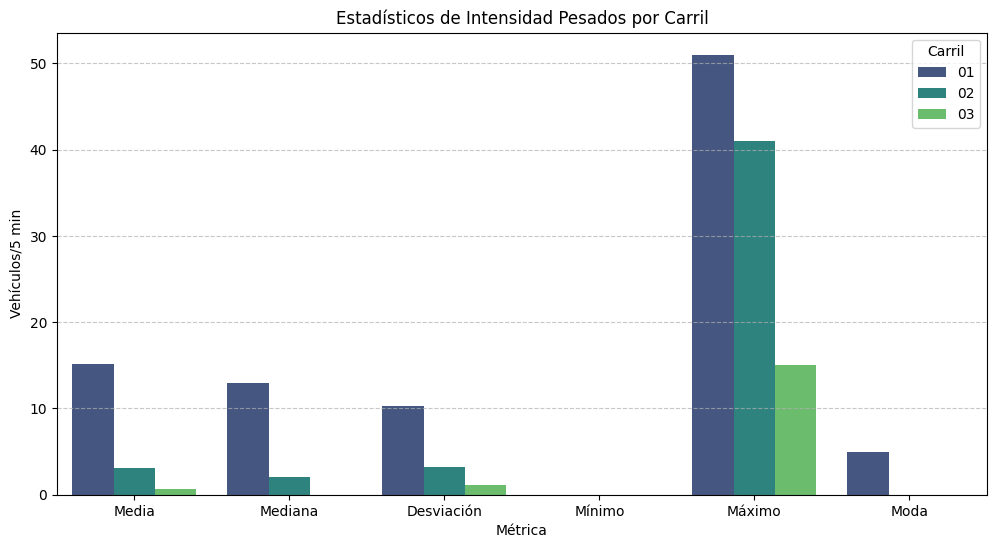

In [102]:
# Se llama a la función prepare_data para la variable "Intensidad pesados"
intensidad_pesados_long = prepare_data(stats_final, "Intensidad_pesados")

# Se crea el gráfico de barras para calcular las métricas de Intensidad Total para cada carril
plt.figure(figsize=(12, 6))
sns.barplot(
    data=intensidad_pesados_long,
    x="Métrica",
    y="Valor",
    hue="Carril",
    palette="viridis",
    order=["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
)
plt.title("Estadísticos de Intensidad Pesados por Carril")
plt.ylabel("Vehículos/5 min")
plt.xlabel("Métrica")
plt.legend(title="Carril")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###### Conclusiones Intensidad pesados

- En cuanto a la intensidad de pesados los resultados obtenidos son muy diferentes a los de la intensidad de ligeros. El carril 01, es decir, el carril derecho, es el que más cantidad de vehículos pesados presenta. Esto se debe a las normal de circulación de este tipo de vehículos, los cuales deben circular por el carril derecho excepto en situaciones puntuales para adelantar.

- Que el máximo sea sorprendentemente alto en el carril 02 indica una situación con bastante tráfico, por tanto es algo puntual.

##### % de pesados

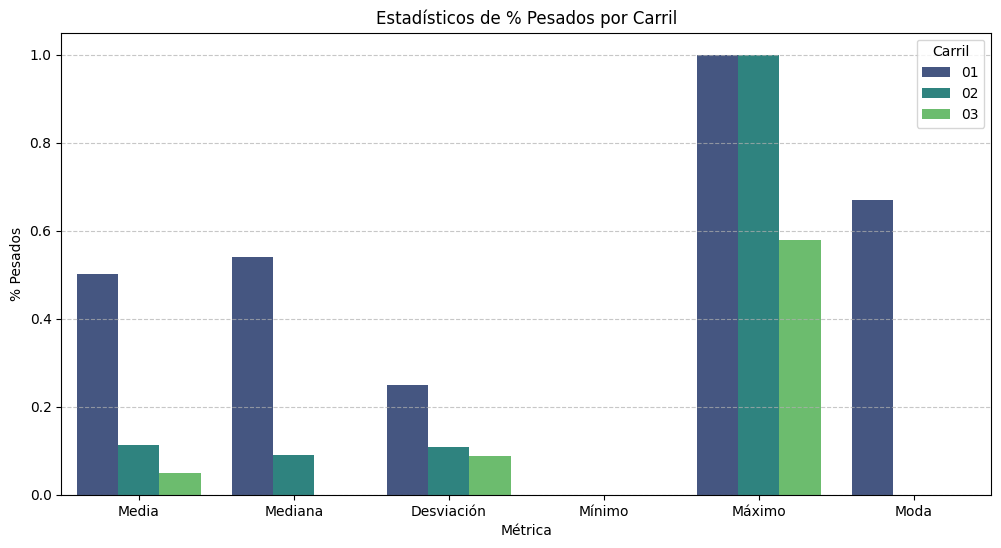

In [106]:
# Se llama a la función prepare_data para la variable "% pesados"

pesados_long = prepare_data(stats_final, "%_pesados")

# Se crea el gráfico de barras para calcular las métricas de Intensidad Total para cada carril

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pesados_long,
    x="Métrica",
    y="Valor",
    hue="Carril",
    palette="viridis",
    order=["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
)
plt.title("Estadísticos de % Pesados por Carril")
plt.ylabel("% Pesados")
plt.xlabel("Métrica")
plt.legend(title="Carril")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

###### Conclusiones % pesados

- En cuanto al % de pesados por carril, destaca la mayor presencia de este tipo de vehículos en el carril derecho (01). 
- La moda indica que es muy común que más del 60% de vehículos que circulan por el carril 01 sean pesados.
- Es importante destacar que el máximo de los carriles 01, 02 y 03 probablemente se deba a vehículos pesados a altas horas de la madrugada haciendo transportes de mercancias o de pasajeros.

##### Velocidad media

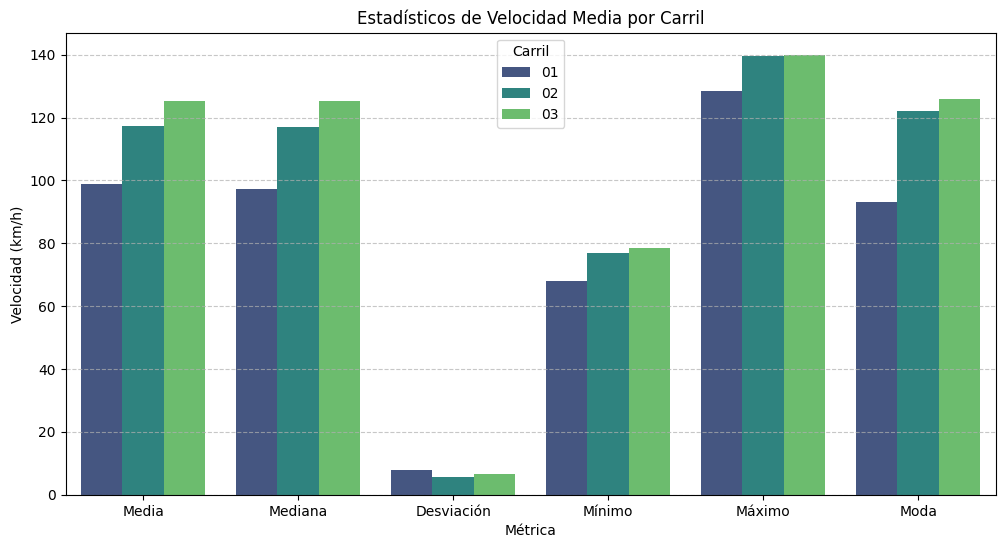

In [110]:
# Se llama a la función prepare_data para la variable "Velocidad Media"

velocidad_long = prepare_data(stats_final, "Velocidad")

# Se crea el gráfico de barras para calcular las métricas de "Velocidad Media" para cada carril

plt.figure(figsize=(12, 6))
sns.barplot(
    data=velocidad_long,
    x="Métrica",
    y="Valor",
    hue="Carril",
    palette="viridis",
    order=["Media", "Mediana", "Desviación", "Mínimo", "Máximo", "Moda"]
)
plt.title("Estadísticos de Velocidad Media por Carril")
plt.ylabel("Velocidad (km/h)")
plt.xlabel("Métrica")
plt.legend(title="Carril")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

###### Conclusiones velocidad media

- En cuanto a las velocidades, como era de esperar, cuanto más a la izquierda se situe el carril, mayor será la velocidad media. Esto se debe a que los carriles 02 y 03 se usan para adelantar.
- El mínimo se situa por encima de la velocidad obligatoria por ley en autovías.


### Visualizaciones en función del tiempo

Generar visualizaciones que permitan conocer el comportamiento del tráfico en función de las features principales, las cuales serían: intensidad total, intensidad de ligeros, intensidad de pesados o velocidad media. Se busca que el candidato represente como se comporta el tráfico en función del tiempo en base a las variables de las que se tienen datos.

- Para visualizar el comportamiento de las features principales del dataframe voy a realizar gráficos de lineas de cada una de ellas en función de la hora del día.
- Además, tras valorarlo, voy a realizar gráficos múltiples en función del día de la semana. 
- Las conclusiones de cada uno de los resultados obtenidos las explicaré tras las representaciones gráficas.

In [116]:
# Para utilizar la hora en las gráficas voy a hacer lo siguiente:
# Pasaré la hora de formato texto a numérico decimal. Con esto podre extrer la hora y los minutos para las gráficas correctamente

df_filtrado['Hora'] = pd.to_datetime(df_filtrado['Hora'], format='%H:%M', errors='coerce').dt.time

df_filtrado['Hora_num'] = df_filtrado['Hora'].apply(lambda x: x.hour + x.minute/60 if pd.notnull(x) else None)

In [117]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

#### Gráficas de Intensidad total

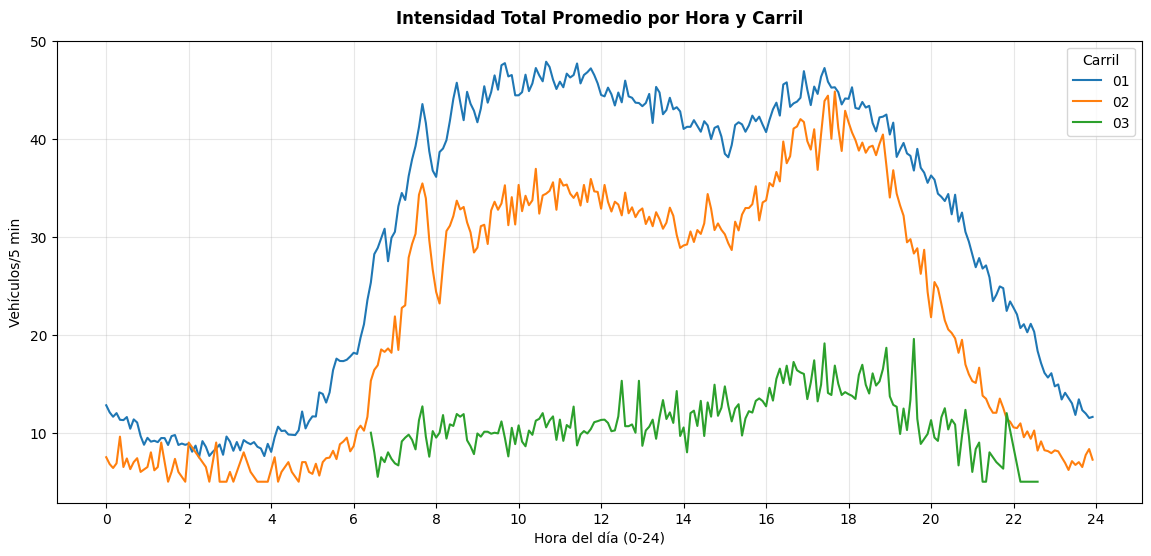

In [120]:
plt.figure(figsize=(14, 6))

# Se crea un gráfico de lineas con seaborn en el que se observa la intensidad total en función de la hora del día

sns.lineplot(
    data=df_filtrado,
    x='Hora_num',
    y='Intensidad total',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},  
    estimator='mean',
    errorbar=None
)

plt.title('Intensidad Total Promedio por Hora y Carril'
             ,y=1.02,  
             fontsize=12,
             fontweight='bold')

plt.xlabel('Hora del día (0-24)')
plt.ylabel('Vehículos/5 min')
plt.xticks(range(0, 25, 2))
plt.grid(alpha=0.3)
plt.legend(title='Carril')
plt.show()


- Me extraña que no hayan valores del carril 03 aproximadamente entre las 22:30 y las 6:30
- Por tanto voy a obtener el número de filas del dataframe en esta franja, para ese carril, para comprobar si realmenten no hay registros

In [123]:
df_t03_noche = df_filtrado[
    (df_filtrado['Carril'] == '03') & 
    ((df_filtrado['Hora_num'] >= 22.5) | (df_filtrado['Hora_num'] <= 6))
]
print(df_t03_noche[['Hora_num', 'Intensidad total', 'Muestras a 0']].head())

        Hora_num  Intensidad total  Muestras a 0
66202  22.583333                 5             2


- Al haber únicamente uno, y tratarse de las 22:30 aprox., llego a la conclusión de que el radar se apaga de 22:30 a 6:00 para el carril 03

In [127]:
print("Valores únicos en 'Dia_semana':", df_filtrado['Dia_semana'].unique())
print("Rango de 'Hora_num':", df_filtrado['Hora_num'].min(), "-", df_filtrado['Hora_num'].max())
print("Valores únicos en 'Carril':", df_filtrado['Carril'].unique())
print("Registros por día:\n", df_filtrado['Dia_semana'].value_counts())

Valores únicos en 'Dia_semana': ['Sábado' 'Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes']
Rango de 'Hora_num': 0.0 - 23.916666666666668
Valores únicos en 'Carril': ['01' '02' '03']
Registros por día:
 Dia_semana
Viernes      2538
Jueves       2340
Miércoles    2275
Lunes        2232
Martes       2229
Sábado       2015
Domingo      1916
Name: count, dtype: int64


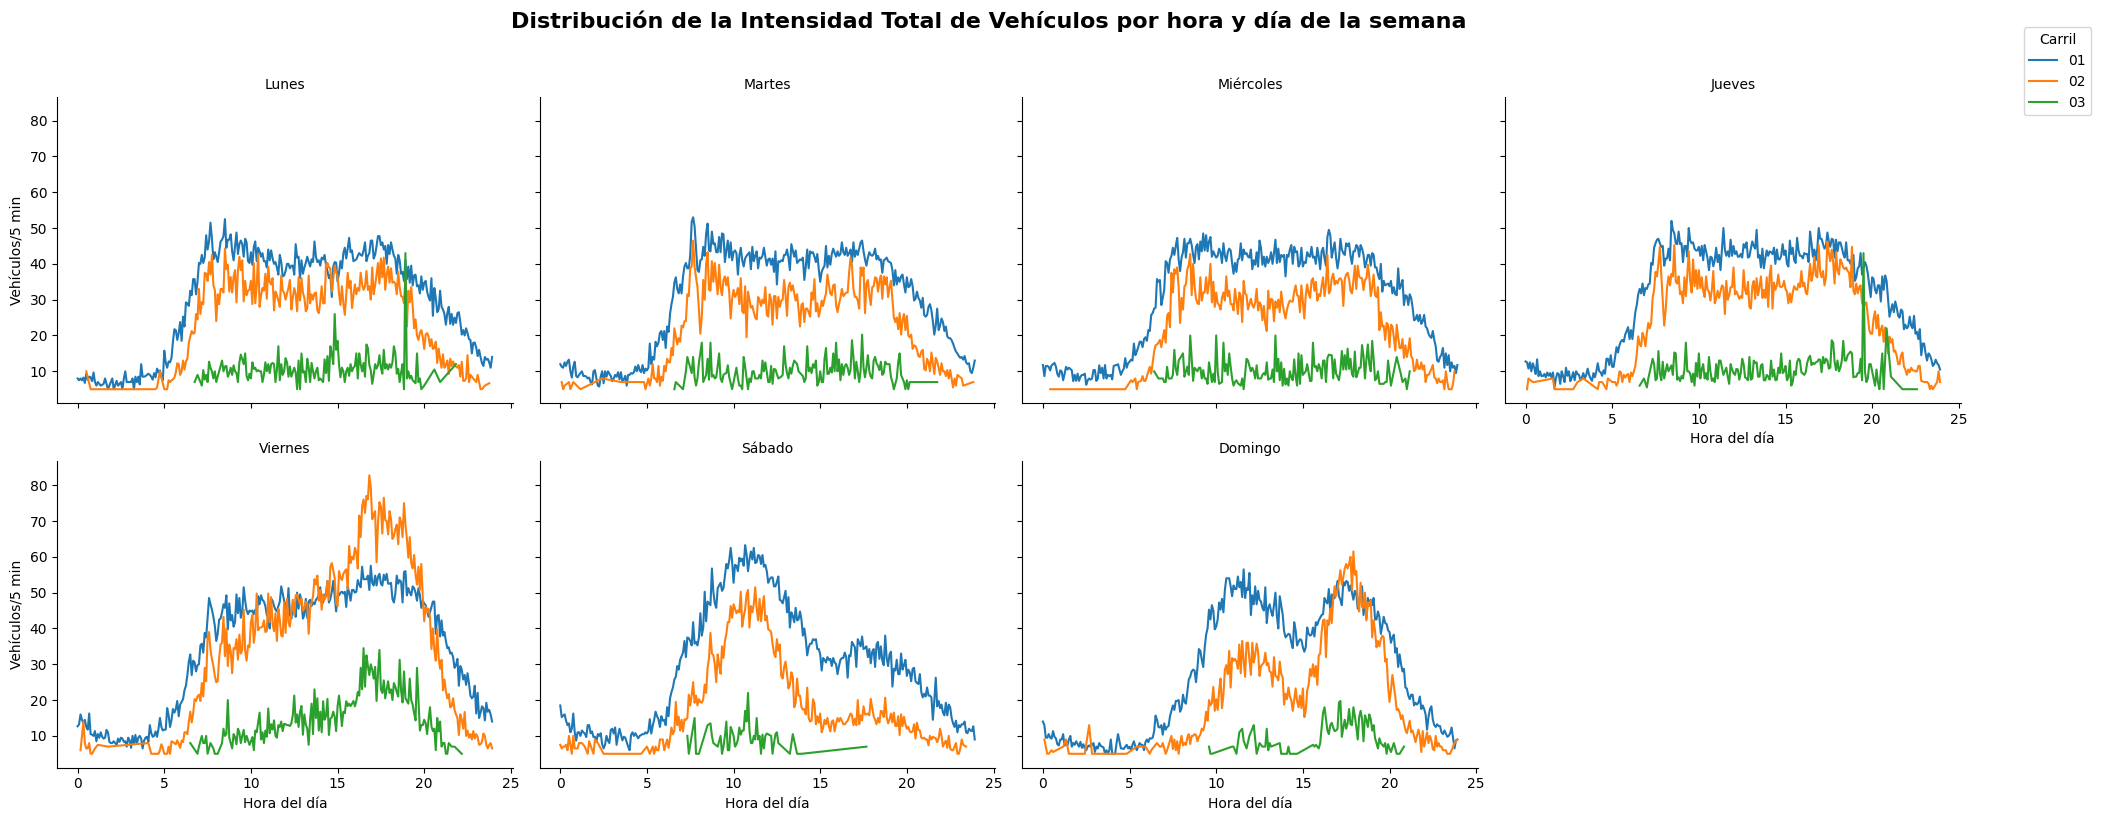

In [128]:
# Se crea la cuadrícula en la que cada valor de col será una gráfica para cada día de la semana

g = sns.FacetGrid(
    df_filtrado,
    col='Dia_semana',
    col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    col_wrap=4,
    height=4,
    aspect=1.2
)

# Se dibujan los gráficos de lineas para cada día de la semana

g.map_dataframe(
    sns.lineplot,
    x='Hora_num',
    y='Intensidad total',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},
    estimator='mean',
    errorbar=None
)
g.set_axis_labels('Hora del día', 'Vehículos/5 min')
g.set_titles('{col_name}')

g.add_legend(title='Carril',
        bbox_to_anchor=(1.02, 1),  
        loc='upper left',  
        borderaxespad=0.1,  
        frameon=True)  
             
plt.suptitle('Distribución de la Intensidad Total de Vehículos por hora y día de la semana',
             y=1.02,  
             fontsize=16,
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Conclusiones Intensidad Total:

###### Promedio por hora y carril
- Hay dos incrementos pronunciados en la cantidad de vehículos en horarios de comienzo y salida de la jornada laboral. A partir de las **6:00** se produce la **primera gran subida**, sobretodo en los **carriles 01 y 02**. De las **6:00 a las 8:00** se pasa de **20 a 40** vehículos en el **carril 01** y de **10 a 30** en el **carril 02**. Esta subida llega a su **máximo** alrededor de las **9:00**, donde encontramos **35 vehículos** en el **carril 01** y **25** en el **carril 02**. Se mantiene en valores elevados durante la duración de la jornada laboral, y finalmente vuelve a **subir** alrededor de las **16:30-17:00**, que es cuando la gente sale de trabajar. En estas horas hay alrededor de **45 vehiculos en el carril 01 y el 02.**
- A partir de las **18:00** se produce una **bajada lineal** de la intensidad total, dado que por la noche no hay tantos vehículos en tránsito.
- El **carril 03** experimenta la mayor **subida** de intensidad entre las **16:30 y las 19:00**. Se situa entre 10-15 vehículos de forma constante.
###### Distribución por hora y carril según el día de la semana
- Como era de esperar, en las horas de **entrada y salida de la jornada laboral** entre semana es cuando se producen los **picos** de intensidad total.
- En el **viernes** se produce la **subida** más pronunciada a partir de las **15:00**. Esto se debe a que normalmente la gente suele salir antes de trabajar y probablemente haya muchos desplazamientos a pueblos o chalets. **El número de vehículos en el carril 02 llega a los 70 entre las 15:00 y las 20:00**. En el **carril 01** se mantiene aldededor de los **50**, y en el **carril 03 entrono a los 25-30.**
- Los **sábados y domingos** hay **grandes subidas** por la manaña entre las **9:00 y las 12:00**, probablemente debido a salidas familiares y de amigos aprovechando los días festivos. Se concentra mucho tráfico a estas horas, alrededor de **40** en el **carril 02** y **50** en el **carril 01**.
- Finalmente se produce una **gran subida** los **domingos** a entre las **17:00 y las 19:00**, debido a que la gente vuelve a la ciudad o a los pueblos para trabajar. La intensidad total se situa entorno a los **50** vehículos tanto en el **carril 01 como en el 02**.

#### Gráficas de Intensidad de ligeros

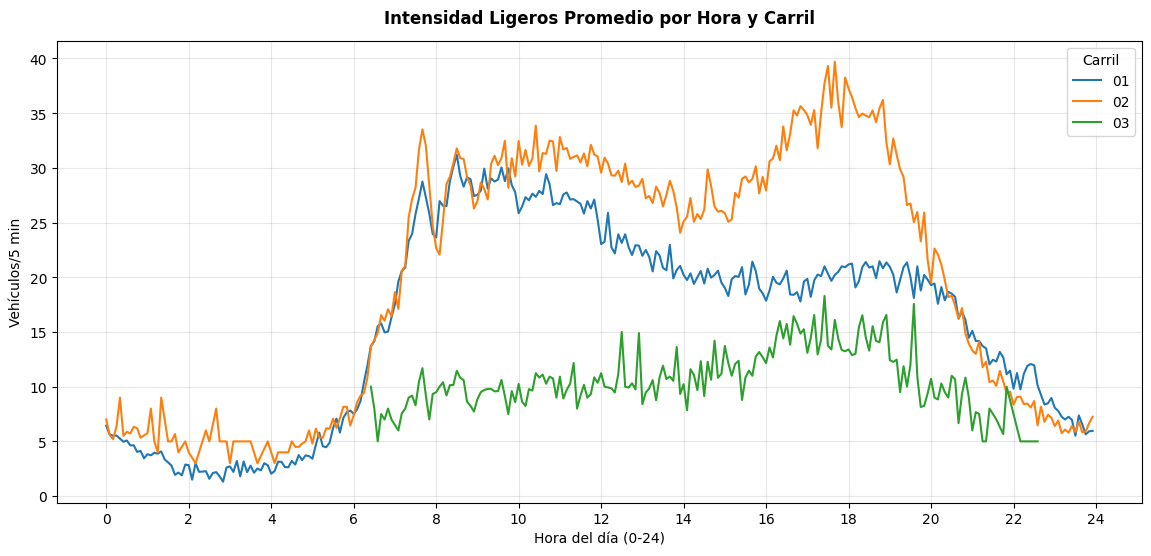

In [131]:
plt.figure(figsize=(14, 6))

# Se crea un gráfico de lineas con seaborn en el que se observa la intensidad de los vehículos ligeros en función de la hora del día

sns.lineplot(
    data=df_filtrado,
    x='Hora_num',
    y='Intensidad ligeros',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},  
    estimator='mean',
    errorbar=None
)

plt.title('Intensidad Ligeros Promedio por Hora y Carril'
             ,y=1.02, 
             fontsize=12,
             fontweight='bold')

plt.xlabel('Hora del día (0-24)')
plt.ylabel('Vehículos/5 min')
plt.xticks(range(0, 25, 2))
plt.grid(alpha=0.3)
plt.legend(title='Carril')
plt.show()


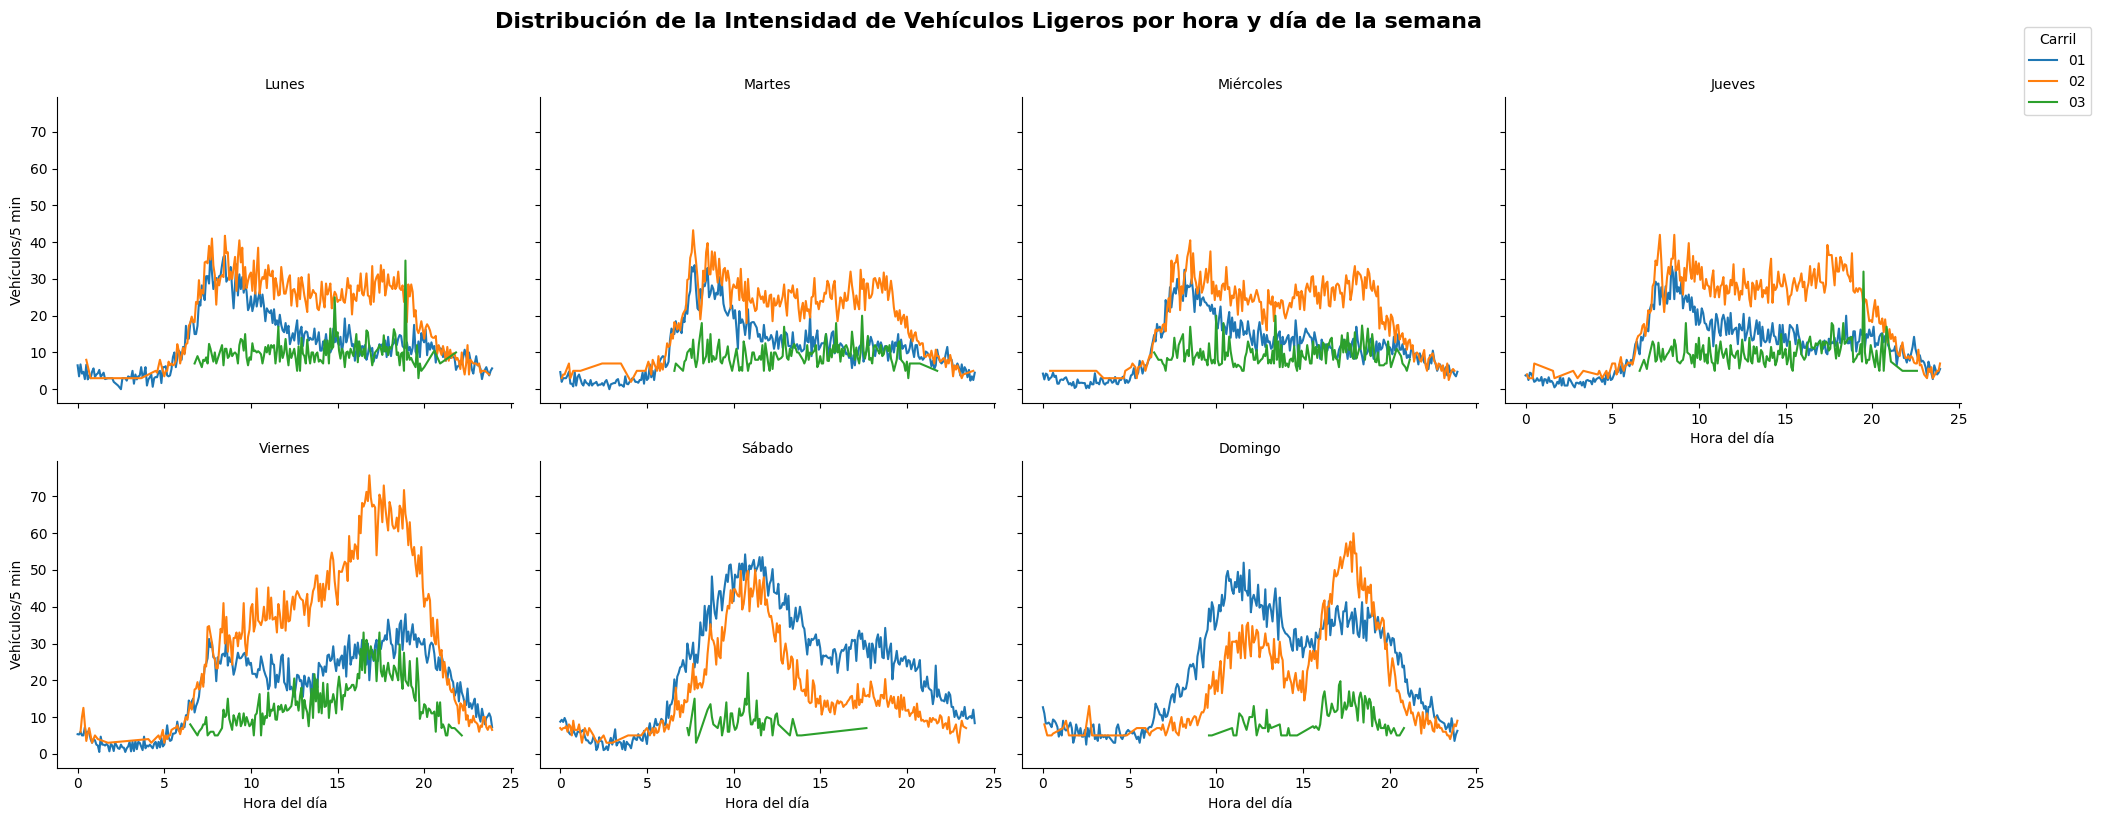

In [132]:
# Se crea la cuadrícula en la que cada valor de col será una gráfica para cada día de la semana

g = sns.FacetGrid(
    df_filtrado,
    col='Dia_semana',
    col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    col_wrap=4, 
    height=4,
    aspect=1.2
)

# Se dibujan los gráficos de lineas para cada día de la semana

g.map_dataframe(
    sns.lineplot,
    x='Hora_num',
    y='Intensidad ligeros',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},
    estimator='mean',
    errorbar=None
)

g.set_axis_labels('Hora del día', 'Vehículos/5 min')
g.set_titles('{col_name}')

g.add_legend(title='Carril',
        bbox_to_anchor=(1.02, 1), 
        loc='upper left',  
        borderaxespad=0.1,  
        frameon=True)  
             
plt.suptitle('Distribución de la Intensidad de Vehículos Ligeros por hora y día de la semana',
             y=1.02, 
             fontsize=16,
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Conclusiones Intensidad de Ligeros:

###### Promedio por hora y carril
- Al igual que en la intensidad total, hay dos incrementos pronunciados en la cantidad de vehículos en horarios de **comienzo y salida de la jornada laboral**. A partir de las **7:00** se produce la **primera gran subida**, sobretodo en los **carriles 01 y 02**. Se mantiene en valores elevados durante la duración de la jornada laboral, y finalmente vuelve a subir considerablemente alrededor de las **16:00**, alcanzando el **punto más alto a las 18:00**, que es cuando mayoritariamente la gente sale de trabajar. A esta hora hay unos **35-40** vehículos ligeros de media en el **carril 02** y unos **20** en el **carril 01**. En el **carril 03** hay alrededor de **15** vehículos ligeros de media.
- A partir de las **19:00** se produce una **bajada** lineal de la intensidad de vehículos ligeros, dado que por la noche no hay tantos vehículos en tránsito.
- El **carril 03** experimenta la mayor **subida** de intensidad entre las **16:00 y las 19:00**.
###### Distribución por hora y carril según el día de la semana
- Como era de esperar, en las horas de **entrada y salida de la jornada laboral entre semana** es cuando se producen los **picos** de intensidad de ligeros.
- En el **viernes** se produce la subida más pronunciada a partir de las 15:00. Esto se debe a que normalmente la gente suele salir antes de trabajar y probablemente haya muchos desplazamientos a pueblos o chalets. **El momento más elevado de afluencia de ligeros es entre las 16:00 y las 19:00**, donde se concentra **una media de 70 vehículos en el carril 02**.
- Los **sábados y domingos** hay grandes **subidas por la manaña entre las 9:00 y las 12:00**, probablemente debido a salidas familiares y de amigos aprovechando los días festivos. Se concentra mucho tráfico a estas horas
- Finalmente se produce una **gran subida los domingos entre las 17:00 y las 19:00**, debido a que la gente vuelve a la ciudad o a los pueblos para trabajar. **En el carril 02 se produce una gran súbida de vehículos, llegando a los 60 en esta franja horaria.**

#### Gráficas de Intensidad de pesados

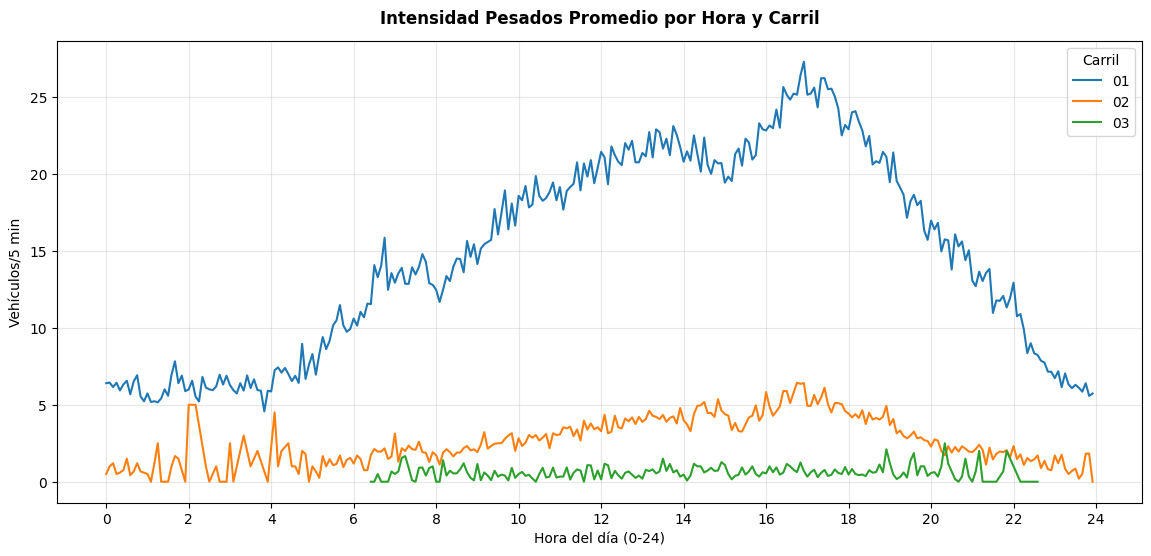

In [135]:
plt.figure(figsize=(14, 6))

# Se crea un gráfico de lineas con seaborn en el que se observa la intensidad total de los vehículos pesados en función de la hora del día

sns.lineplot(
    data=df_filtrado,
    x='Hora_num',
    y='Intensidad pesados',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},  
    estimator='mean',
    errorbar=None
)

plt.title('Intensidad Pesados Promedio por Hora y Carril'            
             ,y=1.02,
             fontsize=12,
             fontweight='bold')

plt.xlabel('Hora del día (0-24)')
plt.ylabel('Vehículos/5 min')
plt.xticks(range(0, 25, 2))
plt.grid(alpha=0.3)
plt.legend(title='Carril')
plt.show()

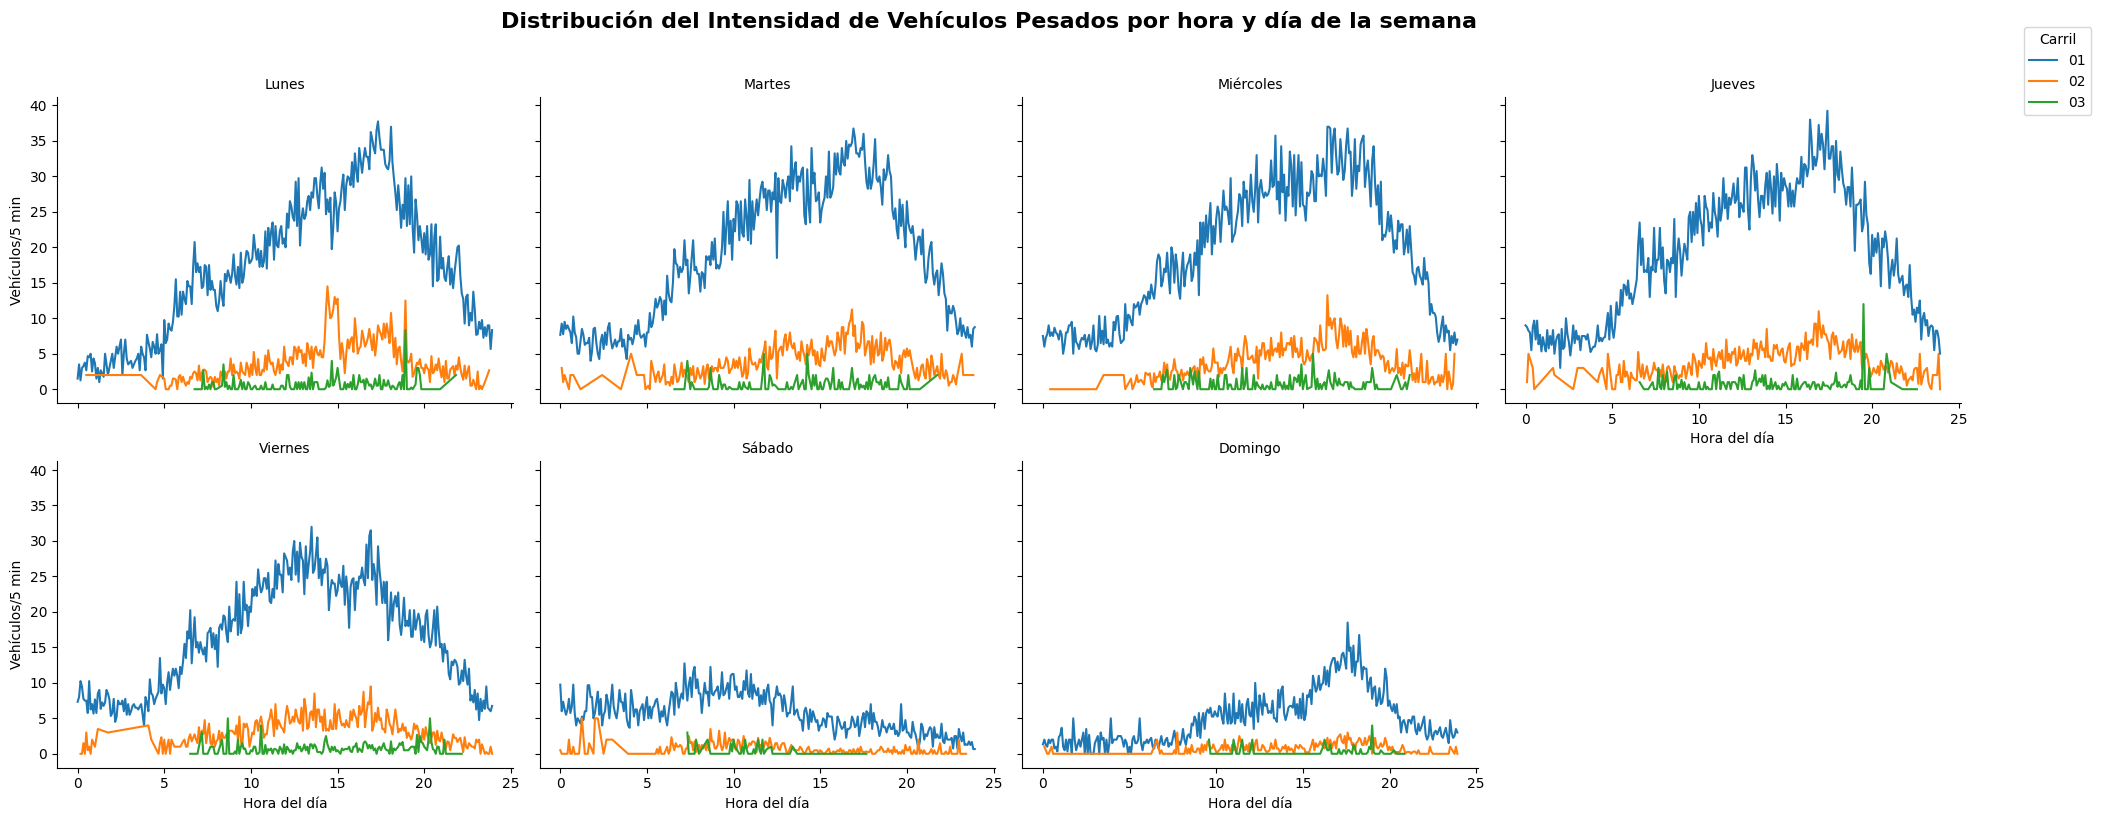

In [137]:
# Se crea la cuadrícula en la que cada valor de col será una gráfica para cada día de la semana

g = sns.FacetGrid(
    df_filtrado,
    col='Dia_semana',
    col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    col_wrap=4,
    height=4,
    aspect=1.2
)

# Se dibujan los gráficos de lineas para cada día de la semana

g.map_dataframe(
    sns.lineplot,
    x='Hora_num',
    y='Intensidad pesados',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},
    estimator='mean',
    errorbar=None
)
g.set_axis_labels('Hora del día', 'Vehículos/5 min')
g.set_titles('{col_name}')

g.add_legend(title='Carril',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',  
        borderaxespad=0.1,
        frameon=True)
             
plt.suptitle('Distribución del Intensidad de Vehículos Pesados por hora y día de la semana',
             y=1.02,  # Ajusta la posición vertical
             fontsize=16,
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Conclusiones Intensidad de Pesados:

###### Promedio por hora y carril
- A partir de las **6:00** se produce una subida lineal especialmente en el **carril 01** que alcanza su **punto más alto** a las **17:00**. A las **6:00** hay una media de **10 vehículos pesados** cada 5 minutos y a las **17:00** este valor llega a los **25**.
- A partir de las **17:00** se produce una **bajada** lineal de vehículos pesados. 
- El **carril 02** experimenta una **subida** al igual que el 01 entre las **6:00 y las 17:00** pero esta es muchísimo **más ligera**. Pasa de **2 a 5** pesados entre estas horas.
###### Distribución por hora y carril según el día de la semana
- De **lunes a viernes** la **gráfica** es casi **idéntica al promedio por hora y carril**, con la excepción que el número como tal es mayor. Entre las **15:00 y las 20:00** se concentran **más de 25 pesados** solo en el **carril 01**, llegando al **máximo a las 17:00-18:00**, donde llega a **35-40**. En el **carril 02** los valores se mantienen alrededor de **6 pesados**.
- Los **sábados y domingos** hay una **bajada muy elevada respecto a los días entre semana**. La intensidad de vehículos pesados se mantiene de forma constante alrededor de **8-10** durante ambos días. La excepción es los **domingos** a partir de las **16:00 hasta las 19:00**, cuando se produce una pequeña **subida** que llega a los **15** pesados en el **carril 01**.
- El **carril 03** tiene valores nulos o **insignificantes**.

#### Gráficas de % de pesados

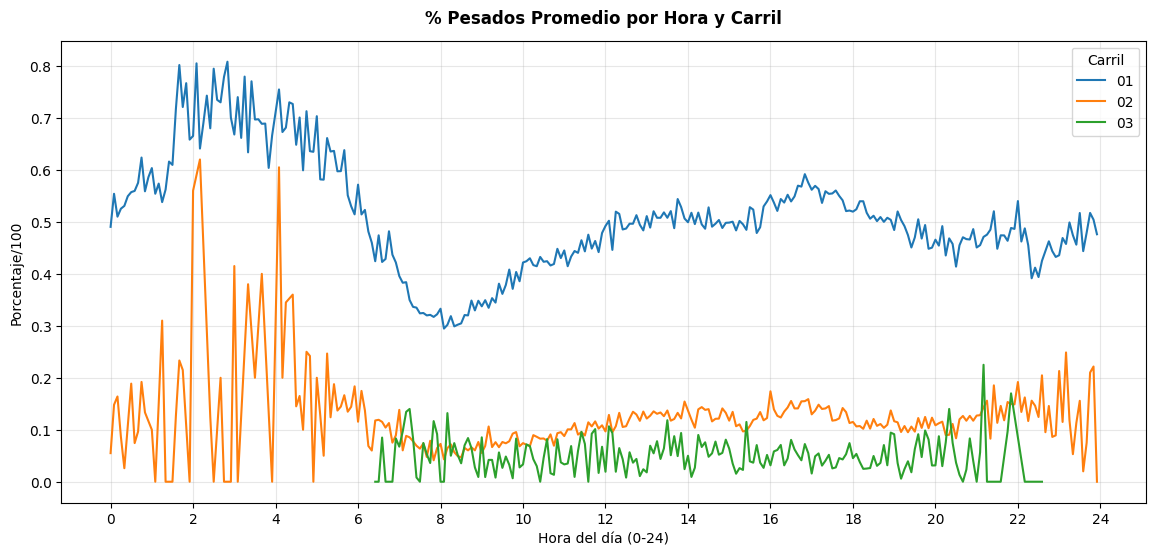

In [142]:
plt.figure(figsize=(14, 6))

# Se crea un gráfico de lineas con seaborn en el que se observa el % de vehiculos pesados en función de la hora del día

sns.lineplot(
    data=df_filtrado,
    x='Hora_num',
    y='% pesados',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},  
    estimator='mean',
    errorbar=None
)

plt.title('% Pesados Promedio por Hora y Carril'
            ,y=1.02,  
             fontsize=12,
             fontweight='bold')

plt.xlabel('Hora del día (0-24)')
plt.ylabel('Porcentaje/100')
plt.xticks(range(0, 25, 2))
plt.grid(alpha=0.3)
plt.legend(title='Carril')
plt.show()

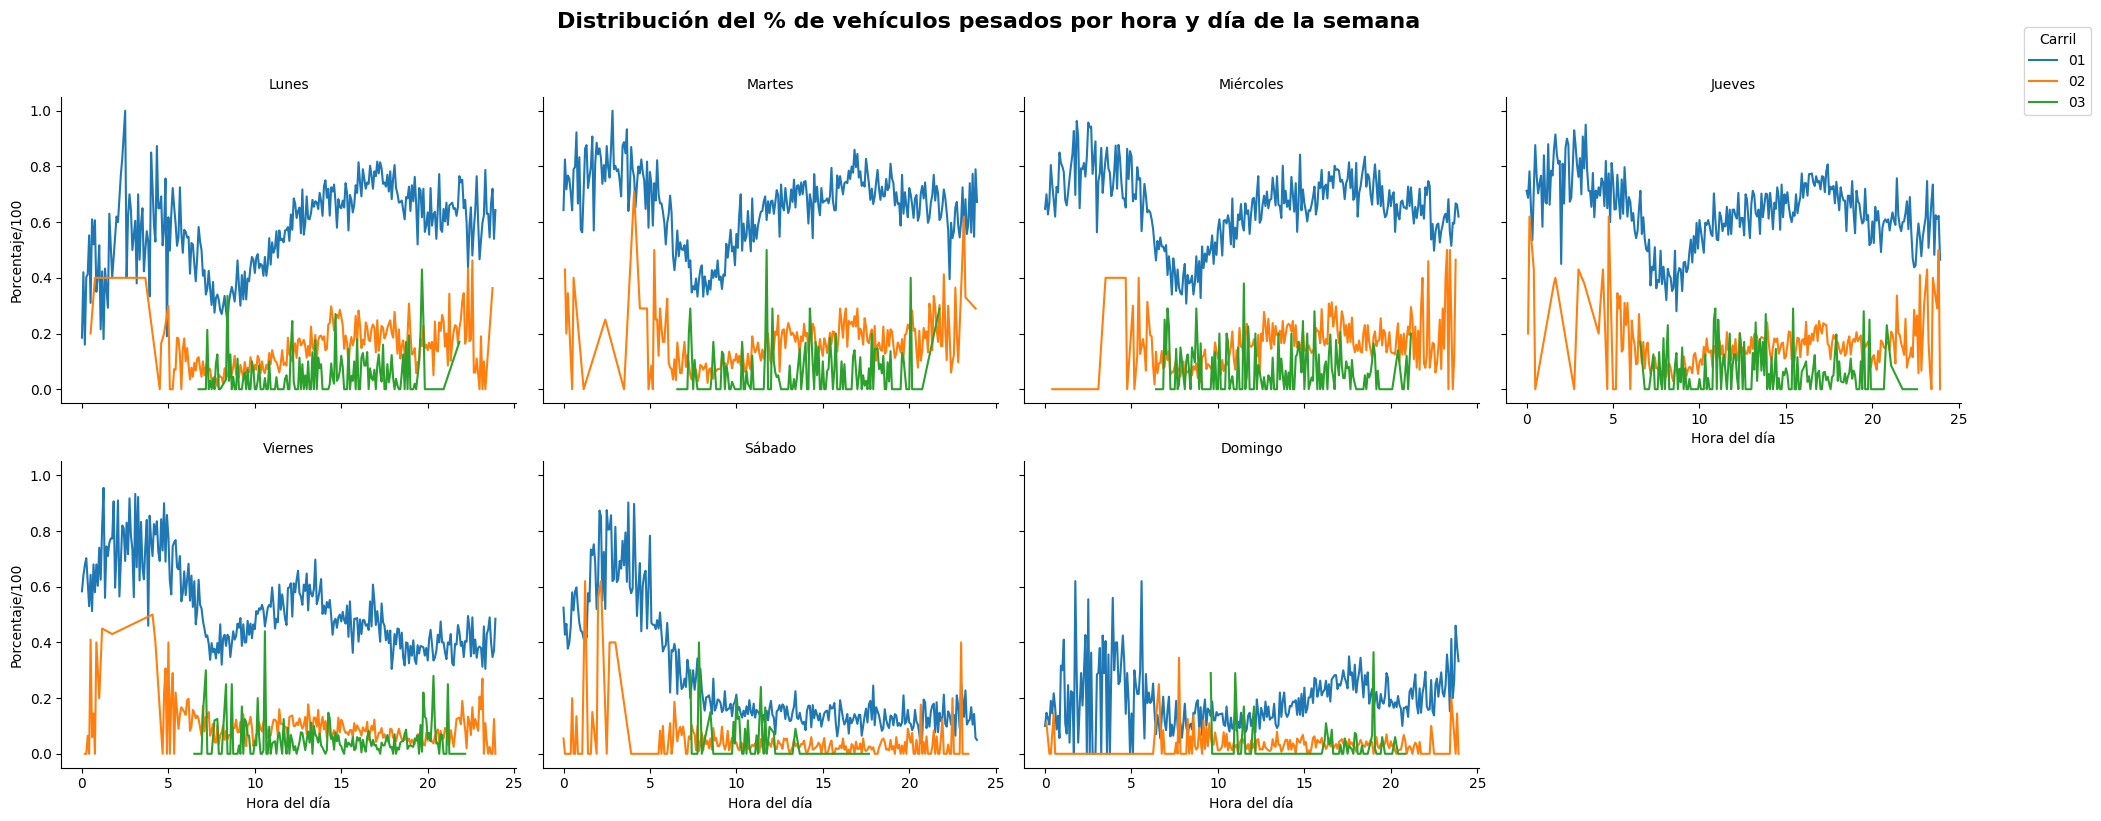

In [143]:
# Se crea la cuadrícula en la que cada valor de col será una gráfica para cada día de la semana

g = sns.FacetGrid(
    df_filtrado,
    col='Dia_semana',
    col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    col_wrap=4,
    height=4,
    aspect=1.2
)

# Se dibujan los gráficos de lineas para cada día de la semana

g.map_dataframe(
    sns.lineplot,
    x='Hora_num',
    y='% pesados',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},
    estimator='mean',
    errorbar=None
)
g.set_axis_labels('Hora del día', 'Porcentaje/100')
g.set_titles('{col_name}')
g.add_legend(
    title='Carril',
    bbox_to_anchor=(1.02, 1),  
    loc='upper left',  
    borderaxespad=0.1,  
    frameon=True 
)
plt.suptitle('Distribución del % de vehículos pesados por hora y día de la semana',
             y=1.02,  
             fontsize=16,
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Conclusiones % de Pesados:

###### Promedio por hora y carril
- Entre las **00:00 y las 6:00** es cuando **más % de vehículos pesados** se encuentran. Se situan por **encima del 50%**, situandose aldededor del **75%** entre la **1:30 y las 5:00**.
- A partir de las **5:00** se produce una **bajada**, llegando al punto más bajo del día a las **8:00** con un **30% de pesados.**
- Desde las **8:00 hasta las 10:00** **sube de forma lineal**, **manteniendose entorno** al **50%** a partir de ese momento **hasta las 00:00.**
###### Distribución por hora y carril según el día de la semana
- De **lunes a viernes** las **gráficas** se mantienen **casi idénticas** a las del **promedio por hora y carril**.
- Los **sábados** se produce una **gran bajada** a partir de las **5:00**. Esta bajada llega al **20%** de vehículos pesados a las **7:00**, manteniendose así hasta la **1:00 del domingo**.
- El **domingo** se produce una subida entre la **1:00 y las 5:00**, llegando al **35-40%**. Entre las **17:30 y las 00:00** del siguiente día se mantiene en el **30%.**

#### Gráficas de Velocidad media

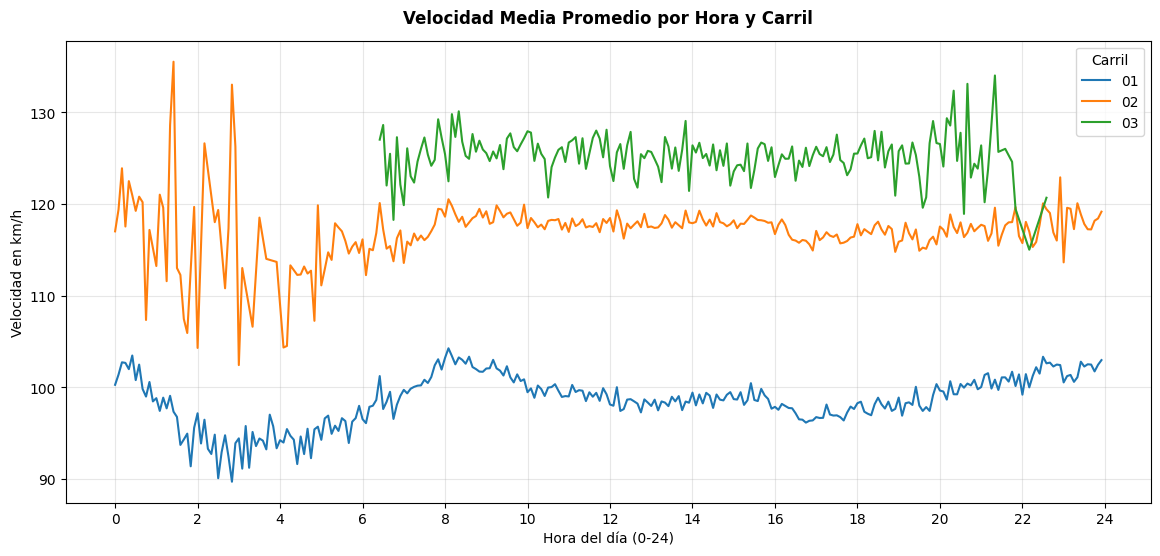

In [146]:
plt.figure(figsize=(14, 6))

# Se crea un gráfico de lineas con seaborn en el que se observa la velocidad media en función de la hora del día

sns.lineplot(
    data=df_filtrado,
    x='Hora_num',
    y='Velocidad media',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},  
    estimator='mean',
    errorbar=None
)

plt.title('Velocidad Media Promedio por Hora y Carril',
         y=1.02,  
         fontsize=12,
         fontweight='bold')

plt.xlabel('Hora del día (0-24)')
plt.ylabel('Velocidad en km/h')
plt.xticks(range(0, 25, 2))
plt.grid(alpha=0.3)
plt.legend(title='Carril')
plt.show()

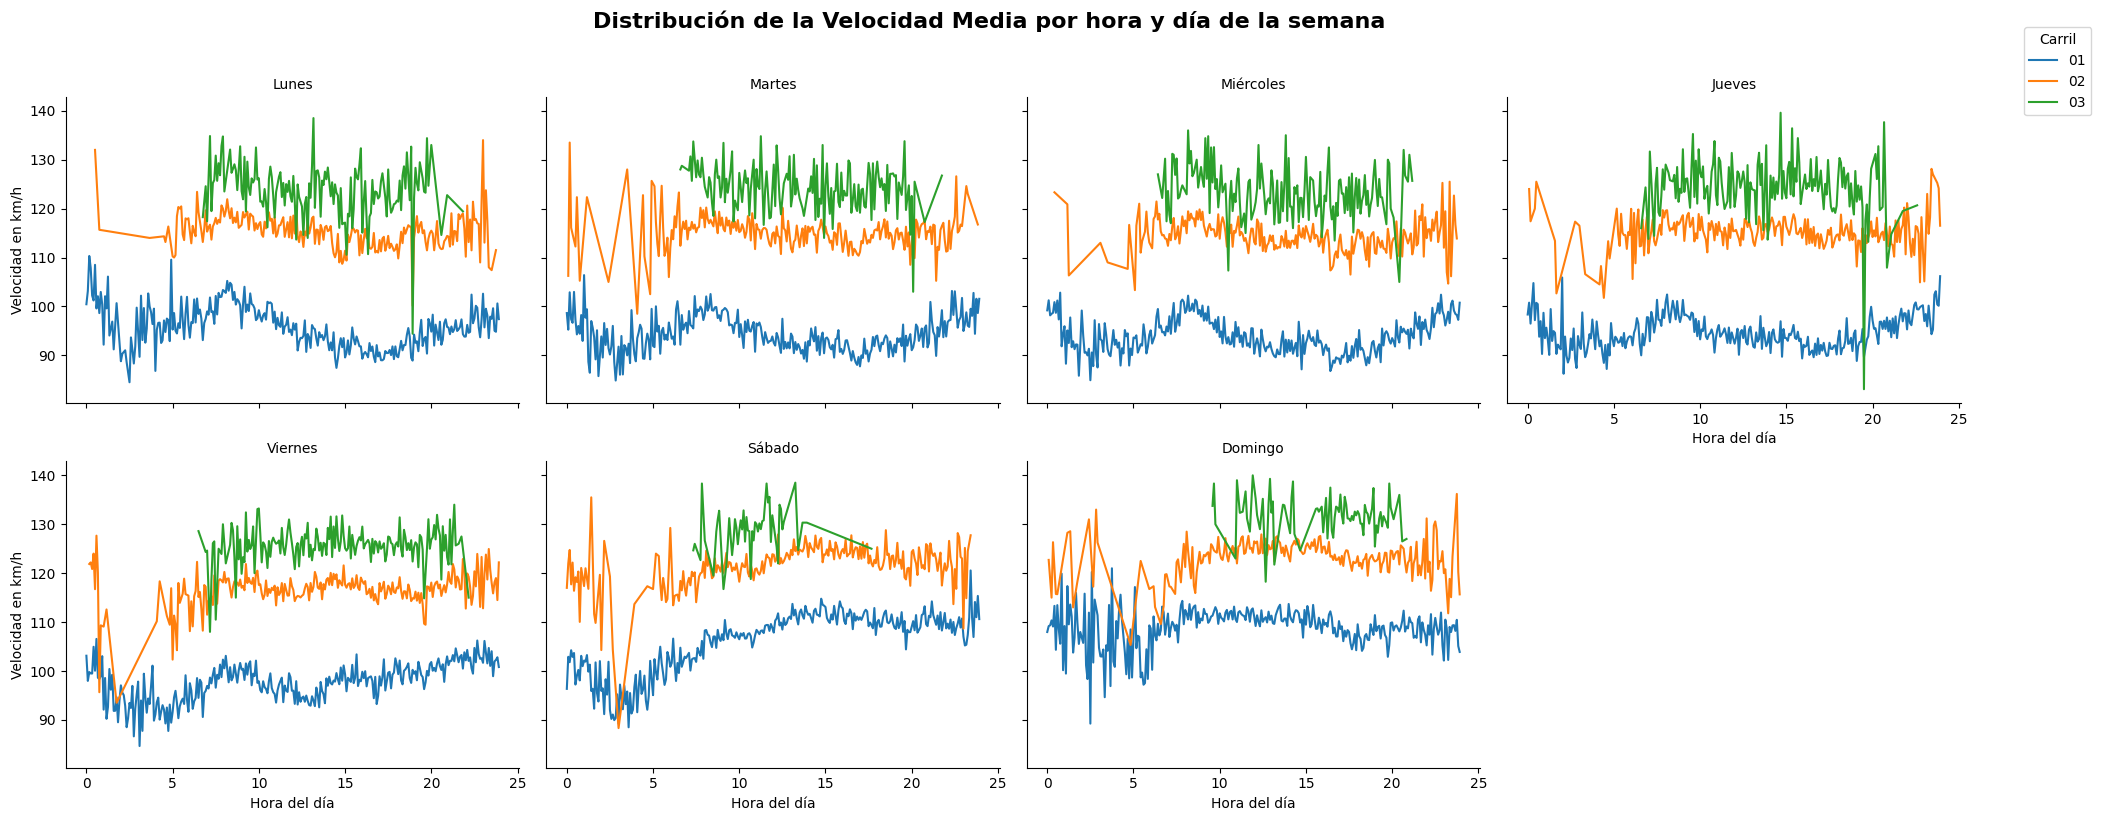

In [147]:
# Se crea la cuadrícula en la que cada valor de col será una gráfica para cada día de la semana

g = sns.FacetGrid(
    df_filtrado,
    col='Dia_semana',
    col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    col_wrap=4,
    height=4,
    aspect=1.2
)

# Se dibujan los gráficos de lineas para cada día de la semana

g.map_dataframe(
    sns.lineplot,
    x='Hora_num',
    y='Velocidad media',
    hue='Carril',
    palette={'01': '#1f77b4', '02': '#ff7f0e', '03': '#2ca02c'},
    estimator='mean',
    errorbar=None
)
g.set_axis_labels('Hora del día', 'Velocidad en km/h')
g.set_titles('{col_name}')
g.add_legend(title='Carril',
        bbox_to_anchor=(1.02, 1),  
        loc='upper left', 
        borderaxespad=0.1,
        frameon=True)

plt.suptitle('Distribución de la Velocidad Media por hora y día de la semana',
             y=1.02,  
             fontsize=16,
             fontweight='bold')
plt.tight_layout()
plt.show()

##### Conclusiones Velocidad Media:

###### Promedio por hora y carril
- Cuanto más a la izquierda se situa el carril más aumenta la velocidad media.
- En el **carril 01** se mantiene entorno a los **100km/h** **excepto** durante la **madrugada**. Durante estas horas, al circular sobretodo **vehículos pesados**, **baja** un poco.
- En el **carril 02** la velocidad se mantiene alrededor de los **115-120 km/h.**
- En el **carril 03 130 km/h** es la velocidad media durante el día.
###### Distribución por hora y carril según el día de la semana
- No hay conclusiones relevantes en cuanto al día de la semana

### Conclusiones

**En base a los estadísticos y las visualizaciones creadas:**

**¿Qué conclusiones se pueden obtener sobre el comportamiento del tráfico en la sección de estudio?
¿Cuál es el carril más usado? ¿Por qué? ¿Cómo influye la hora o el momento del día en el comportamiento del tráfico?
Ten en cuenta que se trata de datos reales que no han sido modificados, por lo que las conclusiones que obtengas representan una realidad.**

- Las conclusiones del comportamiento del tráfico son las indicadas en cada seccion de los gráficos. En las horas de entrada y salida del trabajo entre semana es cuando aumenta significadamente el número de vehículos en circulación.
Los viernes es cuando mayor cantidad de coches se acumulan, sobretodo durante la tarde. Los resultados indican que es el momento de mayor tráfico de la semana. Los sábados por la mañana y los domingos por la tarde también se producen enormes cantidades de tráfico.
- Otro dato relevante es que durante la madrugada más del 60-65% de vehículos son pesados, esto se debe a transportes de mercancias y personas viajando en autobuses.

El carril más usado depende de si el vehículo es ligero o pesado.
- En el caso de los ligeros el más usado es el carril 02 seguido del 01 por poco. La cantidad de vehículos ligeros en el segundo carril aumenta considerablemente en situaciones con mayor tráfico.
- En el caso de los pesados el derecho (carril 01) es el más usado debido a normas de circulación, seguido muy de lejos del carril 02.
- El carril 03 es el menos usado, esto se debe a que solo lo usan vehículos ligeros que alcanzan mayores velocidades. Algún vehiculo pesado ha sido registrado en este carril, pero de forma aislada y sin gran relevancia.
- Por tanto a nivel general el más usado es el carril 01 debido a que los vehículos pesados no usan apenas el segundo carril.

La hora y el momento del día influyen notablemente. Tanto en la intensidad del tráfico como en la utilización de más carriles. La intensidad de ligeros en el carril 02 aumenta considerablemente en momentos de mayor tráfico como he apuntado antes. En el caso de los vehículos pesados aumenta, pero de forma leve.
La entrada y salida del trabajo son críticas, asi como las salidas y los regresos de los fines de semana.
El momento con mayor tráfico son los viernes por la tarde.
Otros momento críticos son los sábados y los domingos por la mañana. 